In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets
wine = datasets.load_wine()


In [3]:
# Seperate features from target

x = pd.DataFrame(wine['data'])

y = wine.target







In [5]:
# train model with a 70/30 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

print(X_train.shape, y_train.shape)



(124, 13) (124,)


In [7]:
# Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaledx = scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

# Train and predict using Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)


In [9]:
# Use cross validation of 10 folds to improve performance

from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(gnb,X_train,y_train,cv=10,scoring='accuracy')

cv_score.mean()

0.9596153846153846

In [14]:
# Train and predict using K nearest neighbors

from sklearn.neighbors import KNeighborsClassifier

import warnings

warnings.filterwarnings('ignore')

# Use different values of K to see what will produce better results

k_range = (1,10,60,100)

k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)


[0.907, 0.9113333333333336, 0.9043333333333333, 0.8983333333333332]


In [15]:
data = pd.read_excel('UniversalBank.xlsx', sheet_name='Data')

bankdata = data

bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [16]:
# Create dummy variables, manually do one hot-encoding

bankdata['family1'] = np.where(bankdata['Family'] == 1,1,0)

bankdata['family2'] = np.where(bankdata['Family'] == 2,1,0)

bankdata['family3'] = np.where(bankdata['Family'] == 3,1,0)

bankdata['family4'] = np.where(bankdata['Family'] == 4,1,0)

bankdata['education1'] = np.where(bankdata['Education'] == 1,1,0)

bankdata['education2'] = np.where(bankdata['Education'] == 2,1,0)

bankdata['education3'] = np.where(bankdata['Education'] == 3,1,0)

# remove columns that we don't want to use

bankdata = bankdata.loc[:, bankdata.columns != 'Personal Loan']

bankdata = bankdata.loc[:, bankdata.columns != 'ID']

bankdata = bankdata.loc[:, bankdata.columns != 'ZIP Code']

bankdataclass = data.loc[:, data.columns == 'Personal Loan']

bankdata.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,family1,family2,family3,family4,education1,education2,education3
0,25,1,49,4,1.6,1,0,1,0,0,0,0,0,0,1,1,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0,0,1,0,1,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,1,0,0,0,0,1,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0,0,0,1,0,1,0


In [17]:
# split data into test/train with 60/40

X_train, X_test, y_train, y_test = train_test_split(bankdata, bankdataclass, test_size = 0.4, random_state=10)

print(X_train.shape, y_train.shape)

# apply knn with n = 1

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

pred=knn.predict(X_test)

# take a look at the confusion matrix and let's see our accuracy

from sklearn.metrics import confusion_matrix,accuracy_score

print(confusion_matrix(y_test,pred))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,pred))






(3000, 18) (3000, 1)
[[1722   94]
 [  86   98]]
0.91


In [18]:
prediction = pd.DataFrame([[40,10,84,2,2,2,0,0,0,1,1,0,1,0,0,0,1,0]])


f = knn.predict(prediction)

f


# Customer would be classified as not loan accepting

array([0], dtype=int64)

Text(0, 0.5, 'Error Rate')

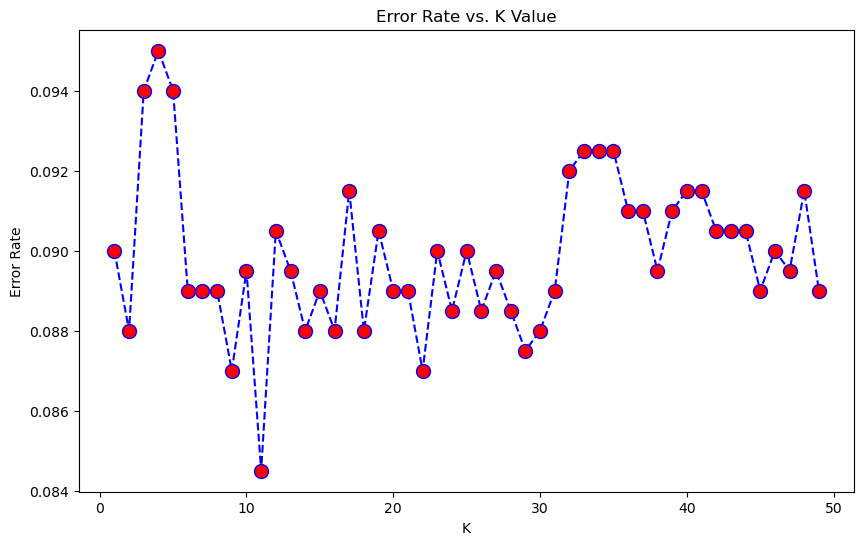

In [19]:
error_rate = []

# takes a while, lets do this for a range of k and see which is best 
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test).reshape(2000,1)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')

plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
# 6 is our best K

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=11')
print('\n Confusion matrix: ')
print(confusion_matrix(y_test,pred))
print('\n')
print('Accuracy: ',accuracy_score(y_test,pred))

WITH K=11

 Confusion matrix: 
[[882  18]
 [ 74  26]]


Accuracy:  0.908


In [30]:
prediction = pd.DataFrame([[40,10,84,2,2,2,0,0,0,1,1,0,1,0,0,0,1,0]])


f = knn.predict(prediction)

f

# Customer would classified as not loan accepting



array([0], dtype=int64)

In [31]:
# let's add in validation now and see how things change

X_train, X_test, y_train, y_test = train_test_split(bankdata, bankdataclass, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.375, random_state=1) # 0.375 x 0.8 = 0.3

In [36]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=11')
print('\n Confusion matrix: ')
print(confusion_matrix(y_test,pred))
print('\n')
print('Accuracy: ',accuracy_score(y_test,pred))

WITH K=11

 Confusion matrix: 
[[882  18]
 [ 74  26]]


Accuracy:  0.908


In [37]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_val)

print('WITH K=11')
print('\n Confusion matrix: ')
print(confusion_matrix(y_val,pred))
print('\n')
print('Accuracy: ',accuracy_score(y_val,pred))

WITH K=11

 Confusion matrix: 
[[1318   32]
 [ 116   34]]


Accuracy:  0.9013333333333333


In [38]:
import random

random.seed(10)
print(random.random())

X_train, X_test, y_train, y_test = train_test_split(bankdata, bankdataclass, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.375, random_state=1) # 0.375 x 0.8 = 0.3

len(X_train)

len(X_val)

0.5714025946899135


1500

Text(0, 0.5, 'Error Rate')

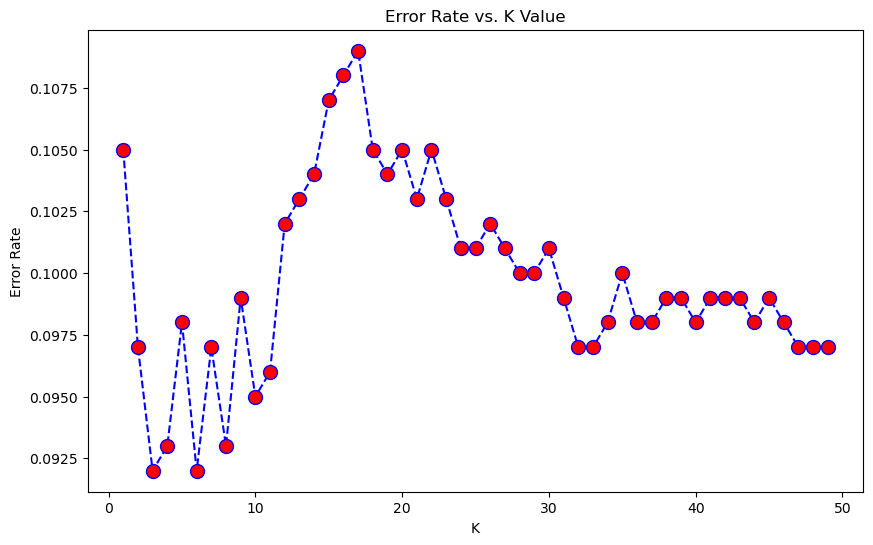

In [35]:
error_rate = []

# takes a little bit
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test).reshape(1000,1)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')

plt.xlabel('K')
plt.ylabel('Error Rate')

In [65]:
# The best K would be 12. We can see that the error rate for each K is different compared to part B